<a href="https://colab.research.google.com/github/megharshetty/Megharshetty/blob/master/attachment_Credit_Card_fraud_lyst2877_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Predict Credit Card Fraud




## Table of Contents
* [1. Problem Statement](#1.-Problem-Statement)  
* [2. Objective](#2.-Objective) 
* [3. Import all scientific and visualization packages](#3.-Import-all-scientific-and-visualization-packages)
* [4. Loading the datasets](#4.-Loading-the-datasets)
    * [4.1 Understand datatypes present in dataframe](#4.1-Understand-datatypes-present-in-dataframe)
* [5. Data Visualization](#5.-Data-Visualization)
    * [5.1 Distribution of amount in credit card transactions](#5.1-Distribution-of-amount-in-credit-card-transactions)
    * [5.2 Distribution of time that transactions were conducted for both fraudulent as well as non fraudulent.](#5.2-Distribution-of-time-that-transactions-were conducted-for-both-fraudulent-as-well-as-non-fraudulent)
    * [5.3 Distribution of attribute V4 for fraudulent and non fraudulent transactions](#5.3-Distribution-of-V4-for-fraudulent- and-non-fraudulent-transactions)
    * [5.4 Scatter plot between time of transaction and amount of transaction](#5.4-Scatter-plot-between-time-of transaction and amount of transaction)
    * [ 5.5 Correlation Heatmap](#5.5-Correlation-Heatmap)
* [6. Handle imbalanced data using SMOTE](#6.-Handle imbalanced data using SMOTE)
    * [6.1 Prepare the data](#6.1-Prepare-the-data)
    * [6.2 Train a logistic regression model](#6.2-Train-a-logistic-regression-model)
    * [6.3 Train a decision tree model](#6.3-Train-a-decision-tree-model)
    * [6.4 Train a random forest classifier model](#6.4-Train-a-random-forest-classifier-model)
    

### 1. Problem Statement

Due to prevalent fraud in finance domain, it is imperative for credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

### 2. Objective

Classify fraudulent transaction from non fraudulent transactions using machine learning algorithms.

### 3. Import all scientific and visualization packages

In [0]:
import pandas as pd                                            # package to manipulate dataframe
import numpy as np                                             # scientific computing package
from sklearn.model_selection import train_test_split           # splitting the data into train and test
from sklearn.linear_model import LogisticRegression            # Building the Logistic Regression model
from sklearn import metrics                                    # Metrics to evalaute the model
from sklearn.metrics import roc_curve, auc                     # Metrics to evalaute the model


## visualization packages

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


### 4. Loading the datasets

In [2]:
!wget https://www.dropbox.com/s/4ep00wfljkogrmo/creditcard.csv   # Loading the credit card.csv dataset from dropbox

--2019-08-30 06:41:22--  https://www.dropbox.com/s/4ep00wfljkogrmo/creditcard.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4ep00wfljkogrmo/creditcard.csv [following]
--2019-08-30 06:41:22--  https://www.dropbox.com/s/raw/4ep00wfljkogrmo/creditcard.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab6b7ae449b63ddf135f37cd4e.dl.dropboxusercontent.com/cd/0/inline/AnlZCUp0zztnidtTjNMeulUNpq3Kxib6AurYkcA-EFVh1-AzbOYoJAfcEeZeT9wJ4YxR4EBhuP5x3HsTDm1j7KZF9pR9b-S4sHSta2Qfe7LAV37rpHyvU1CU6BlPAmXYHsk/file# [following]
--2019-08-30 06:41:22--  https://ucab6b7ae449b63ddf135f37cd4e.dl.dropboxusercontent.com/cd/0/inline/AnlZCUp0zztnidtTjNMeulUNpq3Kxib6AurYkcA-EFVh1-AzbOYoJAfcEeZeT9wJ4YxR4EBhuP5x3HsTDm1j7KZF9pR9b-S4sHSta2Qfe7LA

In [0]:
credit_card_df = pd.read_csv('creditcard.csv')        
#credit_card_ds=pd.read_csv("creditcard.csv")
# Reading the dataframe

In [7]:
credit_card_df.shape # Checking the number of rows and columns

(284807, 31)

In [0]:
# print the first 5 rows of data
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 4.1 Understand datatypes present in dataframe

In [0]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There are no missing values in this dataframe. So data imputation is **not** required.

### 5. Data Visualization

#### 5.1 Distribution of amount in credit card transactions

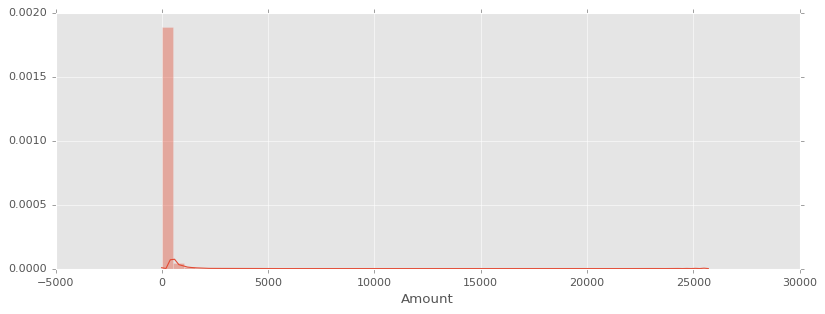

In [66]:
from matplotlib import style
#style.available

style.use('ggplot')
plt.figure(figsize=(12,4))                                 # Setting the figure size
sns.distplot(credit_card_df['Amount'])       

# Creating the histogram

The distribution is right skewed with very less transactions towards the higher amounts.

#### 5.2 Distribution of time that transactions were conducted for both fraudulent as well as non fraudulent.

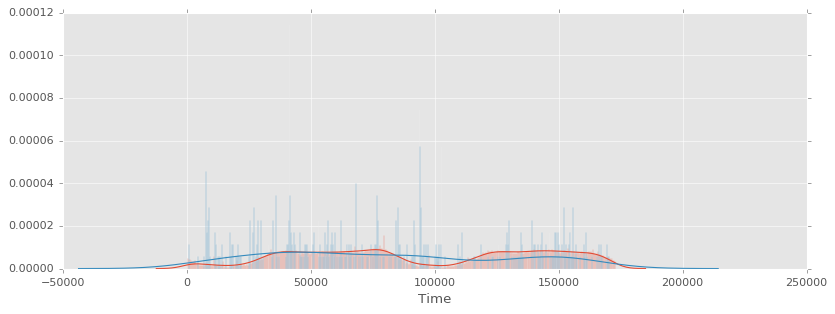

In [56]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")                                                              # Setting the color code
sns.distplot(credit_card_df['Time'],kde=True,bins=480)                                     # distribution of time
#sns.distplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],kde=True,bins=480) 
sns.distplot(credit_card_df.loc[credit_card_df['Class']==1,'Time'],bins=480)
# where there are fraudulant transaction


The time for fraudulent transactions is almost uniformly distributed with a certain level of **repetition or seasonality** after some interval of time.

In [46]:
credit_card_df[credit_card_df['Amount']>2000]['Amount'].count()

676

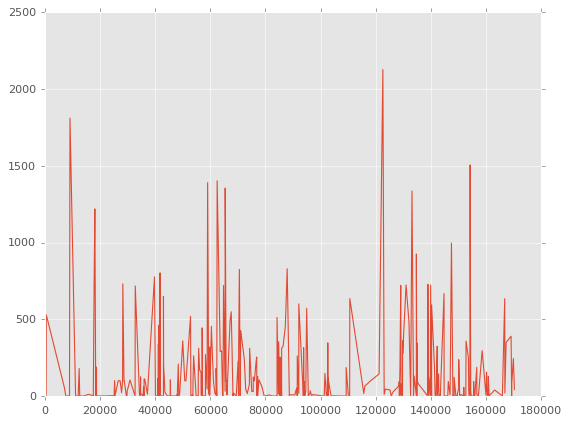

In [74]:
credit_card_df.loc[credit_card_df['Class'] == 1, 'Time']
# x-axis is Time, y-axis is amount
#plt.plot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],credit_card_df.loc[credit_card_df['Class'] == 1, 'Amount']) 
plt.plot(credit_card_df.loc[credit_card_df['Class']==1,'Time'],credit_card_df.loc[credit_card_df['Class']==1,'Amount'])
plt.show()

#### 5.3 Distribution of V4 for fraudulent and non fraudulent transactions

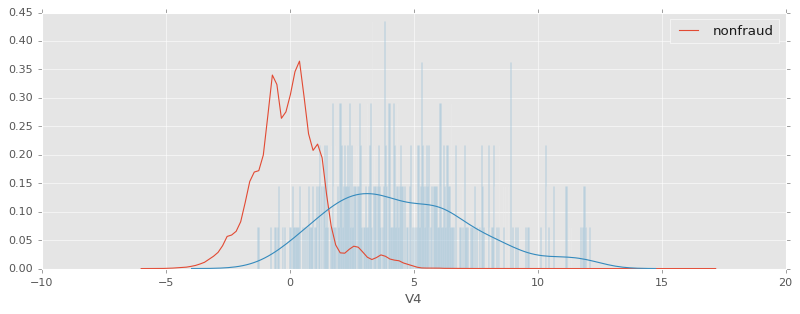

In [101]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
#sns.set_color_codes("pastel")


# Distribution of fraudulent and normal transaction for column V4
#sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'V4'],label='Fraudulent')
#sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 0, 'V4'],label='Normal')

sns.kdeplot(credit_card_df.loc[credit_card_df['Class']==0,'V4'],label='nonfraud')
sns.distplot(credit_card_df.loc[credit_card_df['Class']==1,'V4'],bins=480)

VIt is quite evident that fraudulent and normal transactions are almost separated through this graph with the help of V4 attribute.

#### 5.4 Scatter plot between time of transaction and amount of transaction

<Figure size 1200x800 with 0 Axes>

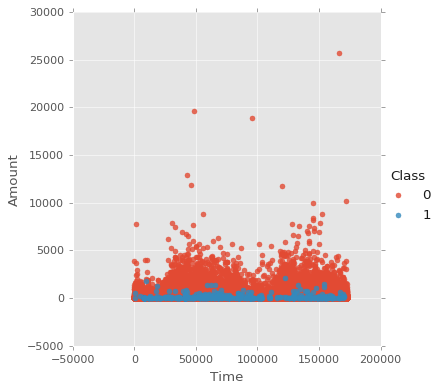

In [89]:
plt.figure(figsize=(15,10))
sns.lmplot('Time',                # Horizontal axis
           'Amount',              # Vertical axis
           data=credit_card_df,   # Data source
           fit_reg=False,         # Don't fix a regression line
           hue="Class",           # Set color
        ) 


It is evident that Fraudulent transactions are mostly below an amount of 1000 and never more than that.

#### 5.5 Correlation Heatmap

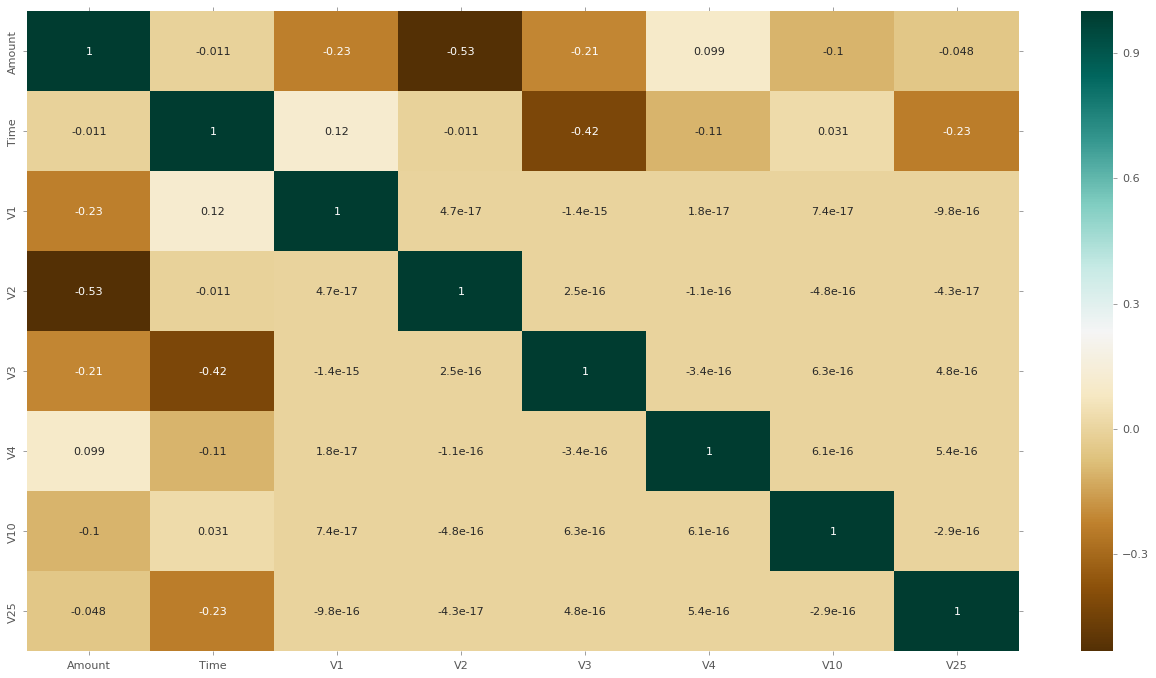

In [94]:
plt.figure(figsize=(20,10))
c = credit_card_df[['Amount','Time','V1','V2','V3','V4','V10','V25']].corr()
sns.heatmap(c,annot=True,cmap='BrBG')
#sns.heatmap(c,cmap="BrBG",annot=True)

Amount is negatively correlated with V2
Time is negatively correlated with V3

In [99]:
credit_card_df[credit_card_df['Class']>0]['Class'].count()

492

### 6. Handle imbalanced data using SMOTE

#### 6.1 Prepare the data

In [112]:
X = credit_card_df.drop(['Class'],axis=1)

y = credit_card_df.Class

z=credit_card_df['Class']

z

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [116]:
y.value_counts()                              # Checking the number of fraudulant and normal transactions

0    284315
1       492
Name: Class, dtype: int64

The classes are highly imbalanced. We need to use SMOTE technique to balance the labels.

In [117]:
!pip install imblearn                         # Installing the smote package

In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')                  # To resample the minority class
X_sm, y_sm = smote.fit_sample(X, y)              # Fit SMOTE on the data

In [0]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

In [122]:
X_test.shape                                    # Checking the number of rows and columns

(187648, 30)

#### 6.2 Train a logistic regression model

In [123]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
# make class predictions for the testing set
print(X_test)
y_pred_class = logreg.predict(X_test)

print(y_pred_class)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

[[ 7.70487894e+04 -3.56408219e-01  1.77204666e+00 ...  2.53302175e-01
   1.55805099e-01  1.00000000e+00]
 [ 8.67425385e+04 -5.59114874e-01  1.28033747e-02 ...  1.83381059e-01
   2.14264893e-01  3.80348272e+02]
 [ 4.26700000e+03 -8.51993654e-01  9.35552982e-01 ... -3.11257097e-04
  -1.25090224e-01  3.05300000e+01]
 ...
 [ 9.43063923e+04 -2.32003722e+01  1.44134919e+01 ... -5.90533234e+00
  -1.10278554e+00  1.21919982e+01]
 [ 1.25615470e+05  1.76401045e+00  1.21803108e+00 ...  5.06788779e-02
   6.47897481e-02  2.97711315e+00]
 [ 1.09872254e+05  1.61152417e+00  1.23745715e+00 ...  1.69298501e-01
   6.71510779e-02  7.28169336e-01]]
[1 0 0 ... 1 1 1]
0.9670713250341064


In [0]:
# examine the class distribution of the testing set
pd.Series(y_test).value_counts()

1    93873
0    93775
dtype: int64

In [0]:
# calculate null accuracy 
pd.Series(y_test).value_counts().head(1) / len(y_test)

1    0.500261
dtype: float64

Accuracy is not an appropriate metric in this scenario. We employ confusion matrix and ROC curve to further understand performance of our model on test data.

In [0]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[92410  1365]
 [ 5295 88578]]


Here the false negatives are very high which means around 1365 are wrongly classifed as non-defaulters when in reality they are defaulters.

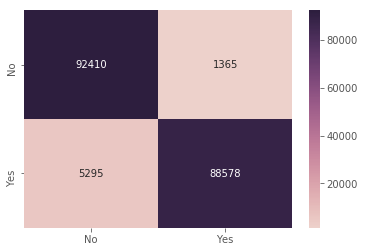

In [0]:
# Visualizing the confusion matrix

cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [0]:
predict_probabilities = logreg.predict_proba(X_test)          # Predict the probability values for X_test
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

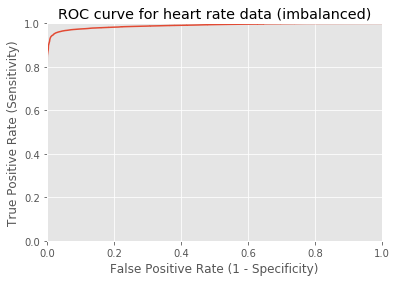

In [0]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data (imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.989440
